<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/upset_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib-venn

In [ ]:
# Install/Upgrade libraries
!pip install --upgrade upsetplot matplotlib pandas seaborn

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

<Figure size 2500x1200 with 0 Axes>

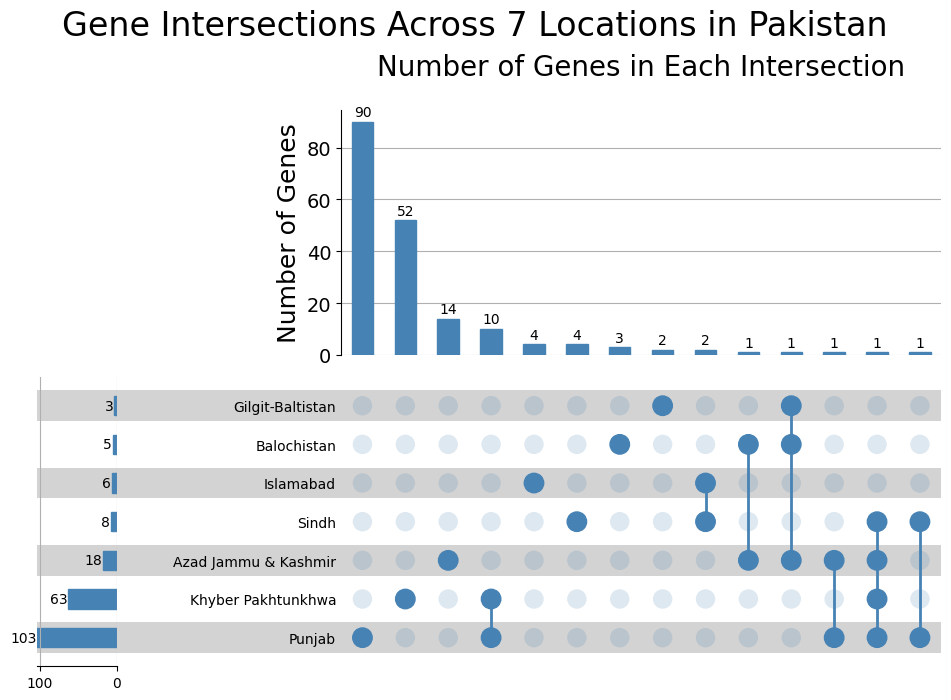

In [16]:
# 2. Import necessary libraries
from upsetplot import plot, from_contents
import pandas as pd
from matplotlib import pyplot as plt
# seaborn is still useful for other plotting if you add it, but not for set_colors in this specific case
# import seaborn as sns

# 3. Define your gene lists as Python sets (as previously extracted)
azad_jammu_kashmir = {
    'CREBBP', 'DDX5', 'ELF1', 'ETV6', 'FLI1', 'GRB2', 'GZMB', 'ORC1L',
    'ORC4', 'PRKAR1B', 'PRKAR2B', 'PTCH1', 'RNF130', 'SAA1', 'TRID1C2',
    'TRID2C9', 'UCN3', 'WDR62'
}

balochistan = {
    'CREBBP', 'ELF1', 'ESR1', 'PTPN11', 'TRITRC2'
}

gilgit_baltistan = {
    'ELF1', 'EP300', 'ITGB6'
}

islamabad = {
    'ATM', 'BRCA1', 'FAM162A', 'HSD17B10', 'LRP1', 'NGLY1'
}

khyber_pakhtunkhwa = {
    'ALGA', 'ARL4C', 'APC', 'ANAPC2', 'ANAPC4', 'APN2', 'APM', 'BICD2',
    'BRMS1', 'CCDC2A', 'CCDC2D4', 'CCNT1', 'CNTN2', 'CNTNAP1', 'CNTNAP2',
    'CYP17A1', 'CYP2U1', 'DCUN1D7', 'DDRGK1', 'DYNC1I2', 'FLT3', 'FAS',
    'FAM12', 'FAM129C', 'GFM1', 'GNB1', 'HCKX1', 'HERC1', 'IGSF1', 'IMR1',
    'PHGDH', 'PFN1', 'PMPCA', 'LMAN2L', 'LRRC2B', 'METTL23', 'MYO6',
    'MPV17', 'NBN', 'PTPN12', 'PDZ2', 'PKMYT1', 'PPP1R1B', 'PRKAA1',
    'PSM1', 'PSMD20', 'RAE1', 'SACS', 'SLC25A1', 'SPATA2', 'SPTBN5',
    'SUMO1', 'TBC1D3', 'TRIDC2C9', 'WDR62', 'WDR26', 'ZNF589',
    'ZNF589B', 'ZNF292', 'ZNF81', 'WDR90', 'WDR92', 'ZNF292', 'ZNF31'
}

punjab = {
    'ADA', 'A1G1', 'AP4M1', 'APP', 'ATP5A1', 'ARAP1', 'ARAP2',
    'ARSA', 'ARSB', 'ATXN1', 'BAQALNT1', 'BAX', 'BAP31', 'BUB1', 'C22A',
    'CASK', 'CCDC82', 'CCND2', 'CCTB8', 'CDH1', 'CEP135', 'CIDEB',
    'COL18A1', 'CORT', 'DDHD2', 'DDRGK1', 'DCX', 'DPH1', 'EIF3E',
    'EXOSC8', 'FAS', 'FBXO11', 'FRB1', 'FRK8', 'GADD4', 'GBA', 'FRS1',
    'GATA6', 'GCN', 'GPKSA', 'GPRA1', 'GPR34', 'GRM1', 'GZMB', 'HBA',
    'HIRA', 'HTAP1L', 'ITPR1', 'KCNJ1', 'LAMB3', 'LRRC2B', 'LRRC3',
    'LRP1B1', 'MADR93', 'MCOLN1', 'MECP2', 'MEG19', 'METTL23', 'METTL4',
    'MLH1', 'MSS51', 'MSRGE', 'NBN', 'NOP2', 'OGT', 'PDE4', 'PFN4',
    'PUS7', 'PTPN50', 'RGR', 'RPL3', 'RYK', 'SACS', 'SERPINA10',
    'SEPTIN6', 'SIP1', 'SLC2A2', 'SLC43A2', 'SLC7A10', 'SMARCC1', 'SPG1',
    'SPG11', 'TBC1D8', 'TFG', 'TIM22', 'TMM27', 'TMEM222', 'TMEM67', 'TPM1',
    'TR', 'TRANK1', 'TRID1C2B', 'TRITC9', 'TRD2C9', 'USP44', 'USP46',
    'WDR62', 'WDR90', 'ZCCHC5', 'CEP155', 'ZNF292', 'WDR90', 'WDR92', 'ZNF292',
    'ZNF31'
}

sindh = {
    'ATM', 'BUB1', 'HICPH1', 'LRP1', 'NFE4', 'NFE5', 'TUSC3', 'WDR62'
}

# Create a dictionary of your sets, mapping location names to gene sets
all_locations_genes = {
    'Azad Jammu & Kashmir': azad_jammu_kashmir,
    'Balochistan': balochistan,
    'Gilgit-Baltistan': gilgit_baltistan,
    'Islamabad': islamabad,
    'Khyber Pakhtunkhwa': khyber_pakhtunkhwa,
    'Punjab': punjab,
    'Sindh': sindh,
}

# 4. Generate data for UpSet plot
upset_data = from_contents(all_locations_genes)

# 5. Define a color palette for your locations (will not be used in plot() but can be for other visuals)
# palette = sns.color_palette("tab10", n_colors=len(all_locations_genes))
# set_colors = {name: color for name, color in zip(all_locations_genes.keys(), palette)}

# ... (your existing code for defining all_locations_genes and upset_data) ...

# ... (your existing code for defining all_locations_genes, upset_data, and plotting) ...

# ... (your existing code for defining all_locations_genes, upset_data) ...

# 6. Generate the UpSet plot with customizations
# Increased figure width significantly for better spacing
plt.figure(figsize=(25, 12)) # <-- INCREASED FIGURE SIZE

plot(upset_data,
     show_counts=True,
     sort_by='cardinality',
     element_size=40,
     facecolor='steelblue',
     shading_color='lightgrey',
    )

# Adjust font sizes for titles and labels if they still overlap
plt.suptitle("Gene Intersections Across 7 Locations in Pakistan", fontsize=24, y=1.02) # Slightly larger title
plt.title("Number of Genes in Each Intersection", fontsize=20, pad=25) # Slightly larger subtitle
plt.xlabel("Intersection Size", fontsize=18) # Slightly larger x-axis label
plt.ylabel("Number of Genes", fontsize=18) # Slightly larger y-axis label

plt.xticks(fontsize=14) # Slightly larger x-tick labels
plt.yticks(fontsize=14) # Slightly larger y-tick labels

# You might need to further adjust specific text elements if they still overlap.
# For example, to adjust the set labels (location names on the left):
# You can try to make them smaller if they are overlapping:
# plt.gca().axes[0].tick_params(axis='y', labelsize=12) # For the left bar chart labels
# For the intersection count labels (numbers above the top bars), UpSetPlot handles them,
# but if they overlap, a smaller font for show_counts might be needed (not directly exposed in plot() args)
# or you might need to make the figure even wider.

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title/label overlap

# --- Save the figure (uncomment to save) ---
# plt.savefig('gene_intersections_upset_plot_600dpi.png', dpi=600, bbox_inches='tight')

plt.show() # Display the plot

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

<Figure size 2800x1400 with 0 Axes>

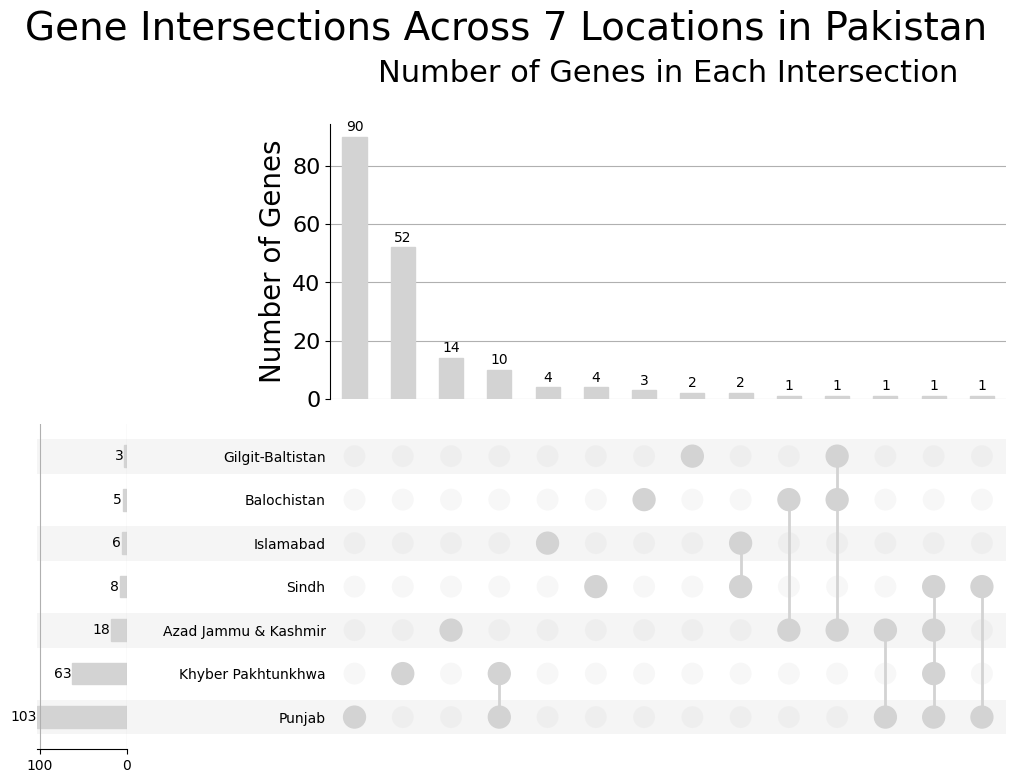

In [18]:
# 2. Import necessary libraries
from upsetplot import plot, from_contents
import pandas as pd
from matplotlib import pyplot as plt
# seaborn is not strictly needed if set_colors and point_color are not supported
# import seaborn as sns

# 3. Define your gene lists as Python sets (as previously extracted)
azad_jammu_kashmir = {
    'CREBBP', 'DDX5', 'ELF1', 'ETV6', 'FLI1', 'GRB2', 'GZMB', 'ORC1L',
    'ORC4', 'PRKAR1B', 'PRKAR2B', 'PTCH1', 'RNF130', 'SAA1', 'TRID1C2',
    'TRID2C9', 'UCN3', 'WDR62'
}

balochistan = {
    'CREBBP', 'ELF1', 'ESR1', 'PTPN11', 'TRITRC2'
}

gilgit_baltistan = {
    'ELF1', 'EP300', 'ITGB6'
}

islamabad = {
    'ATM', 'BRCA1', 'FAM162A', 'HSD17B10', 'LRP1', 'NGLY1'
}

khyber_pakhtunkhwa = {
    'ALGA', 'ARL4C', 'APC', 'ANAPC2', 'ANAPC4', 'APN2', 'APM', 'BICD2',
    'BRMS1', 'CCDC2A', 'CCDC2D4', 'CCNT1', 'CNTN2', 'CNTNAP1', 'CNTNAP2',
    'CYP17A1', 'CYP2U1', 'DCUN1D7', 'DDRGK1', 'DYNC1I2', 'FLT3', 'FAS',
    'FAM12', 'FAM129C', 'GFM1', 'GNB1', 'HCKX1', 'HERC1', 'IGSF1', 'IMR1',
    'PHGDH', 'PFN1', 'PMPCA', 'LMAN2L', 'LRRC2B', 'METTL23', 'MYO6',
    'MPV17', 'NBN', 'PTPN12', 'PDZ2', 'PKMYT1', 'PPP1R1B', 'PRKAA1',
    'PSM1', 'PSMD20', 'RAE1', 'SACS', 'SLC25A1', 'SPATA2', 'SPTBN5',
    'SUMO1', 'TBC1D3', 'TRIDC2C9', 'WDR62', 'WDR26', 'ZNF589',
    'ZNF589B', 'ZNF292', 'ZNF81', 'WDR90', 'WDR92', 'ZNF292', 'ZNF31'
}

punjab = {
    'ADA', 'A1G1', 'AP4M1', 'APP', 'ATP5A1', 'ARAP1', 'ARAP2',
    'ARSA', 'ARSB', 'ATXN1', 'BAQALNT1', 'BAX', 'BAP31', 'BUB1', 'C22A',
    'CASK', 'CCDC82', 'CCND2', 'CCTB8', 'CDH1', 'CEP135', 'CIDEB',
    'COL18A1', 'CORT', 'DDHD2', 'DDRGK1', 'DCX', 'DPH1', 'EIF3E',
    'EXOSC8', 'FAS', 'FBXO11', 'FRB1', 'FRK8', 'GADD4', 'GBA', 'FRS1',
    'GATA6', 'GCN', 'GPKSA', 'GPRA1', 'GPR34', 'GRM1', 'GZMB', 'HBA',
    'HIRA', 'HTAP1L', 'ITPR1', 'KCNJ1', 'LAMB3', 'LRRC2B', 'LRRC3',
    'LRP1B1', 'MADR93', 'MCOLN1', 'MECP2', 'MEG19', 'METTL23', 'METTL4',
    'MLH1', 'MSS51', 'MSRGE', 'NBN', 'NOP2', 'OGT', 'PDE4', 'PFN4',
    'PUS7', 'PTPN50', 'RGR', 'RPL3', 'RYK', 'SACS', 'SERPINA10',
    'SEPTIN6', 'SIP1', 'SLC2A2', 'SLC43A2', 'SLC7A10', 'SMARCC1', 'SPG1',
    'SPG11', 'TBC1D8', 'TFG', 'TIM22', 'TMM27', 'TMEM222', 'TMEM67', 'TPM1',
    'TR', 'TRANK1', 'TRID1C2B', 'TRITC9', 'TRD2C9', 'USP44', 'USP46',
    'WDR62', 'WDR90', 'ZCCHC5', 'CEP155', 'ZNF292', 'WDR90', 'WDR92', 'ZNF292',
    'ZNF31'
}

sindh = {
    'ATM', 'BUB1', 'HICPH1', 'LRP1', 'NFE4', 'NFE5', 'TUSC3', 'WDR62'
}

# Create a dictionary of your sets, mapping location names to gene sets
all_locations_genes = {
    'Azad Jammu & Kashmir': azad_jammu_kashmir,
    'Balochistan': balochistan,
    'Gilgit-Baltistan': gilgit_baltistan,
    'Islamabad': islamabad,
    'Khyber Pakhtunkhwa': khyber_pakhtunkhwa,
    'Punjab': punjab,
    'Sindh': sindh,
}

# 4. Generate data for UpSet plot
upset_data = from_contents(all_locations_genes)

# 5. Generate the UpSet plot using only arguments that should be widely supported
plt.figure(figsize=(28, 14)) # Largest figure size for maximum space

plot(upset_data,
     show_counts=True,
     sort_by='cardinality',
     element_size=45, # Size of dots in the matrix
     # Removed: set_colors, point_color, query_semantics
     facecolor='lightgray', # A general background color for the intersection bars
     shading_color='whitesmoke', # Subtle alternating background for matrix rows
    )

# Adjust font sizes for maximum readability
plt.suptitle("Gene Intersections Across 7 Locations in Pakistan", fontsize=28, y=1.02)
plt.title("Number of Genes in Each Intersection", fontsize=22, pad=30)
plt.xlabel("Intersection Size", fontsize=20)
plt.ylabel("Number of Genes", fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.98]) # Increased padding around the entire plot

# --- Save the figure ---
plt.savefig('gene_intersections_upset_plot_final_600dpi.png', dpi=600, bbox_inches='tight')

plt.show()